# Plot the potential vs time profile

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
file = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/echm/20220712_G_SnO_beamtime_01_GCPL_C01.txt'
EC = pd.read_csv(file,
                 delimiter='\t',
                 skiprows=81,
                 usecols=[7,11,16,20,24],
                 names= ['Time', 'E','I','Capacity','n'],
                 engine='python')

EC['Time'] = EC['Time']/3600
EC['Capacity'] = EC['Capacity']/0.002049

file2 = 'C:/Users/opid31/Desktop/graphite_SnO2_BT2/echm/20220712_G_SnO_beamtime_02_GCPL_C01.txt'
EC2 = pd.read_csv(file2,
                 delimiter='\t',
                 skiprows=81,
                 usecols=[7,11,16,20,24],
                 names= ['Time', 'E','I','Capacity','n'],
                 engine='python')

EC2['Time'] = EC2['Time']/3600
EC2['Capacity'] = EC2['Capacity']/0.002049

In [19]:
EC

,Time,E,I,Capacity,n
0,0.000000,3.225125,0.000000,0.000000,0.0
1,0.002778,3.225010,0.000000,0.000000,0.0
2,0.005556,3.225239,0.000000,0.000000,0.0
3,0.008333,3.225354,0.000000,0.000000,0.0
4,0.011111,3.225144,0.000000,0.000000,0.0
...,...,...,...,...,...
31283,19.111864,2.999610,0.012114,473.091070,0.0
31284,19.114641,2.999687,0.012069,473.107433,0.0
31285,19.117419,2.999534,0.012017,473.123725,0.0
31286,19.120197,2.999553,0.011976,473.139961,0.0


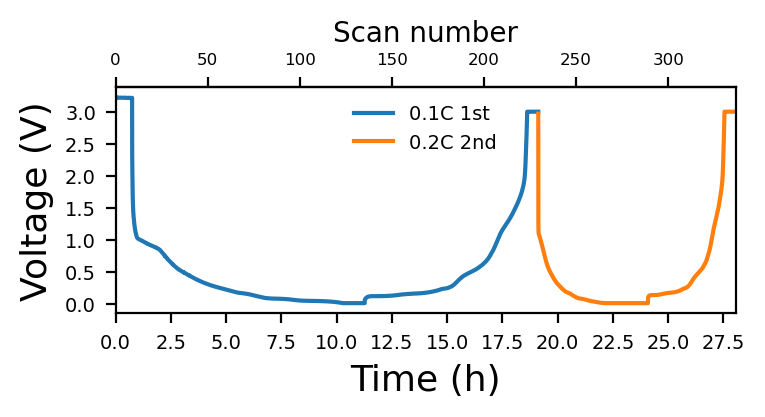

In [15]:
fig = plt.figure(figsize=(4, 1.5), dpi=200)
grid = plt.GridSpec(1, 1, hspace=0.25, wspace=0.25)
ECP = fig.add_subplot(grid[0, 0])

ECP.plot(EC['Time'],EC['E'], label='0.1C 1st')
ECP.plot(EC2['Time'],EC2['E'], label='0.2C 2nd')
ECP.set_xlabel('Time (h)',fontdict={'fontsize':13})
ECP.set_ylabel('Voltage (V)',fontdict={'fontsize':13})
ECP.set_xlim(0, EC2['Time'].max())
ECP.set_yticks(np.arange(0, 3.5 , step = 0.5))
ECP.set_xticks(np.arange(0, EC2['Time'].max(), step =2.5))
ECP.tick_params(axis='x',
                which='both',
                bottom=True,    # ticks along the bottom edge are off
                top=False,    # ticks along the top edge are off
                labelbottom=True,
                labeltop=False,
                labelsize=7.0)
ECP.tick_params(axis='y', labelsize=7.0)
ECP.legend(['0.1C 1st','0.2C 2nd'] ,frameon=False, fontsize=7)


### set 
def T2S(x):
    return x*12

def S2T(x):
    return x/12

secax = ECP.secondary_xaxis('top', functions=(T2S,S2T))
#secax.set_xticks(np.arange(0,,step=20))
secax.tick_params(axis='x', labelsize=6.0)
"""
#r1: 11~34
#r2: 42~65
#r3: 81~128 (middle)
#r4: 140~164
#r5: 172~196
#r6: 204~230

### plot the shaded area to mark the relaxation
sh = [7,20, 23,32, 71,81, 87,99, 102,115]

i=0

for n in range(5):
    ECP.axvspan(sh[i]/6, sh[i+1]/6, color='plum', alpha=0.5, lw=0)
    i=i+2

ECP.axvspan(40, 64, color='orange', alpha=0.5, lw=0)
"""
secax.set_xlabel('Scan number')
plt.savefig('BT2_EvsT.png', bbox_inches='tight')

# Plot the GSC profiles

Text(0.5, 1.0, 'BT2 Graphite SnO2')

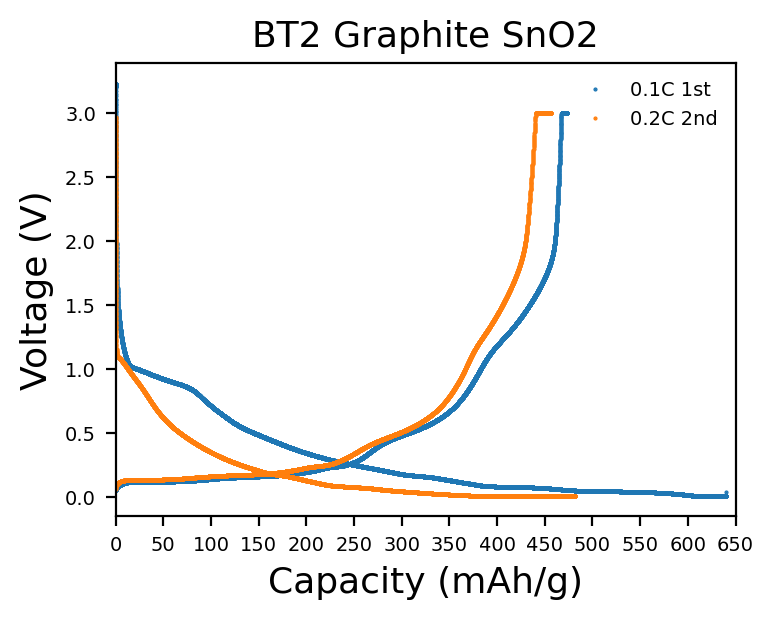

In [32]:
fig = plt.figure(figsize=(4, 3), dpi=200)
grid = plt.GridSpec(1, 1, hspace=0.25, wspace=0.25)
ECP = fig.add_subplot(grid[0, 0])

ECP.plot(EC['Capacity'],EC['E'], '.', markersize=1)
ECP.plot(EC2['Capacity'],EC2['E'], '.',markersize=1)
ECP.set_xlabel('Capacity (mAh/g)',fontdict={'fontsize':13})
ECP.set_ylabel('Voltage (V)',fontdict={'fontsize':13})
ECP.set_xlim(0, EC['Capacity'].max())
ECP.set_yticks(np.arange(0, 3.5 , step = 0.5))
ECP.set_xticks(np.arange(0, 700, step =50))
ECP.tick_params(axis='x',
                which='both',
                bottom=True,    # ticks along the bottom edge are off
                top=False,    # ticks along the top edge are off
                labelbottom=True,
                labeltop=False,
                labelsize=7.0)
ECP.tick_params(axis='y', labelsize=7.0)
ECP.legend(['0.1C 1st','0.2C 2nd'] ,frameon=False, fontsize=7)
ECP.set_title('BT2 Graphite SnO2', fontdict={'fontsize':13})

#plt.savefig('BT2_EvsCapity.png', bbox_inches='tight')

# Plot dQ/dV profiles

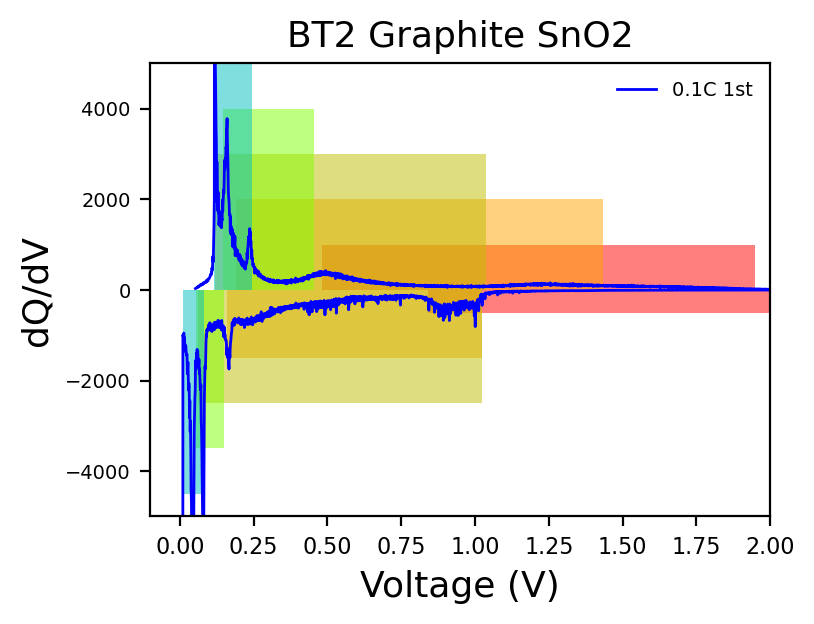

In [37]:
from scipy import interpolate
from numpy import diff

file_Sn = 'C:/Users/opid31/Desktop/Scripts for SAXS & WAXS/Sn_phases.csv'
Sn_phases = pd.read_csv(file_Sn, engine='python')

EC1_lith = EC[EC['I'] < 0]
EC1_delith = EC[EC['I'] > 0]

EC2_lith = EC2[EC2['I'] < 0]
EC2_delith = EC2[EC2['I'] > 0]

E = [EC1_lith, EC1_delith]#, EC2_lith, EC2_delith]
interp_func = [] 
interp_E = [] 
interp_C = [] 
dQdV = [] 

fig = plt.figure(figsize=(4, 3), dpi=200)
grid = plt.GridSpec(1, 1, hspace=0.25, wspace=0.25)
ECP = fig.add_subplot(grid[0, 0])

colorlist=['b', 'b',  'r', 'r', 'orange',  'orange', 'g', 'g', 'r', 'r']

ECP.set_prop_cycle(color=colorlist)

for i in range(len(E)):
    interp_func.append(interpolate.interp1d(E[i]['E'], E[i]['Capacity'], kind= 'linear'))
    interp_E.append(np.linspace(E[i]['E'].min(), E[i]['E'].max(), 3000))
    interp_C.append(interp_func[i](interp_E[i]))
    dQdV.append(diff(interp_C[i])/diff(interp_E[i]))
    interp_E[i] = np.delete(interp_E[i], -1)
    ECP.plot( interp_E[i], dQdV[i], lw='1')

ECP.set_ylabel('dQ/dV',fontdict={'fontsize':13})
ECP.set_xlabel('Voltage (V)',fontdict={'fontsize':13})

ECP.set_ylim(-5000, 5000)
ECP.set_xlim(-0.1, 2)

ECP.tick_params(axis='x',
                which='both',
                bottom=True,    # ticks along the bottom edge are off
                top=False,    # ticks along the top edge are off
                labelbottom=True,
                labeltop=False,
                labelsize=8.0)
legend = ['0.1C 1st']#,'','0.2C 2nd','']
ECP.tick_params(axis='y', labelsize=7.0)
ECP.legend( legend,frameon=False, fontsize=7)
ECP.set_title('BT2 Graphite SnO2', fontdict={'fontsize':13})


colorlist2=[ 'red','red', 'orange','orange', 'y','y',  'Chartreuse','Chartreuse', 'c','c']#, 'red','red', 'orange','orange']#, 'b','b', 'm','m']

i=0
j=0
for j in range(len(colorlist2)):
    ECP.axvspan(Sn_phases.loc[i,'Potential'], Sn_phases.loc[i+1,'Potential'], 
                0.5, 0.5+0.05*(j+1)*(-1)**(j+1), color= colorlist2[j], alpha=0.5, lw=0)
    i=i+2
    j=j+1         


plt.savefig('BT2_dQdV.png', bbox_inches='tight')

In [4]:
Sn_phases

,Scan,Potential
0,0,3.225125
1,12,0.842175
2,96,0.482943
3,111,1.949030
4,6,1.022732
5,35,0.160381
6,86,0.189053
7,108,1.433213
8,6,1.022732
9,48,0.063118


# Plot cycle number vs capacity

In [150]:
file1 = 'C:/Users/opid31/Desktop/BT3_graphite_SnO2/echm/20220706_SnO2_G_long_cycling_C04.txt'
file2 = 'C:/Users/opid31/Desktop/BT3_graphite_SnO2/echm/20220706_SnO2_G_long_cycling2_C04.txt'

EC1 = pd.read_csv(file1,
                 delimiter='\t',
                 skiprows=81,
                 usecols=[7,11,16,20,24],
                 names= ['Time', 'E','I','Capacity','n'],
                 engine='python')

EC1['Time'] = EC1['Time']/3600
EC1['Capacity'] = EC1['Capacity']/0.002049

EC2 = pd.read_csv(file2,
                 delimiter='\t',
                 skiprows=81,
                 usecols=[7,11,16,20,24],
                 names= ['Time', 'E','I','Capacity','n'],
                 engine='python')

EC2['Time'] = EC2['Time']/3600
EC2['Capacity'] = EC2['Capacity']/0.002049

In [178]:
cycle_num = np.arange(0, 74, 1)

EC_lith = []
EC_delith = []

C_lith = np.empty(0)
C_delith = np.empty(0)

for i in range(0,len(cycle_num)):
    EC_lith.append(EC2[(EC2.n == i) & (EC2.I < 0)])
    EC_delith.append(EC2[(EC2.n == i) & (EC2.I > 0)])
    C_lith = np.append(C_lith, EC_lith[i]['Capacity'].max())
    C_delith = np.append(C_delith, EC_delith[i]['Capacity'].max())


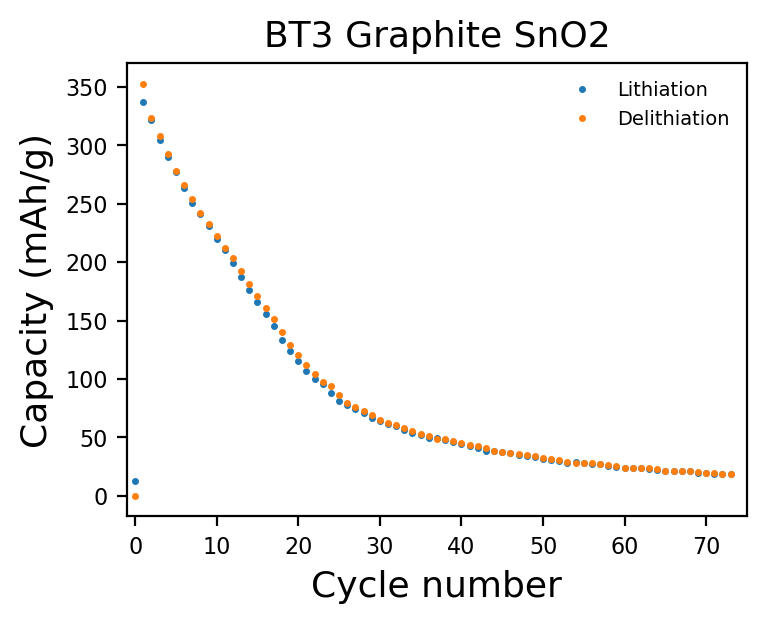

In [187]:
fig = plt.figure(figsize=(4, 3), dpi=200)
grid = plt.GridSpec(1, 1, hspace=0.25, wspace=0.25)
ECP = fig.add_subplot(grid[0, 0])

ECP.plot(cycle_num, C_lith, 'o', markersize=1.5)
ECP.plot(cycle_num, C_delith, 'o', markersize=1.5)
ECP.legend(['Lithiation', 'Delithiation'], frameon=False, fontsize=7)

ECP.set_xlabel('Cycle number',fontdict={'fontsize':13})
ECP.set_ylabel('Capacity (mAh/g)',fontdict={'fontsize':13})
ECP.set_xlim(-1, cycle_num[-1]+2)
ECP.set_xticks(np.arange(0, 75, step =10))
ECP.tick_params(axis='x',
                which='both',
                bottom=True,    # ticks along the bottom edge are off
                top=False,    # ticks along the top edge are off
                labelbottom=True,
                labeltop=False,
                labelsize=8.0)
ECP.tick_params(axis='y', labelsize=8.0)
ECP.set_title('BT3 Graphite SnO2', fontdict={'fontsize':13})

plt.savefig('Long cycling.png', bbox_inches='tight')